<a href="https://colab.research.google.com/github/ustab/BTK-PythonTensorflow/blob/master/text_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction 

In this notebook, following the news of Facebook selling data, the users' feelings towards facebook are analyzed with text mining.

This Notebook was created by Yunus Emre Gündoğmuş.

**Yunus Emre Gündoğmuş - Nisan 2018**

# Contents

1. Information about Data's
2. Importing Data's and Required Libraries
3. Dip into Data's
4. Strategy Determination
5. Visualization of Available Data with Bar Graph
6. Text Mining
7. Investigation of Text Mining Results
8. Source 

# 1) Information about Data's

I am going to talk about the project that I'm analyzing with the text mining of the users' feelings after the news of Facebook's Data Sales

First, tell me what I did for Data before it started
* 3 I open a form with variable
* Variables: Age, Thought (Thought), Thought (Written)
* I then transformed it into a dataset by separating the Thought (Written) Variable which would be helpful if I did Text Mining
I made a dataset in the Remaining Age and Thought
* I then pulled the last month's data for "Facebook Data Leak" searches from Google Trends and added a dataset to it
* My data processing for this data

** Note: All Datalar gathered from Google Docs and Facebook Users **

# 2) Importing Data's and Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
dataword = pd.read_csv('/content/sample_data/maindata.csv')
datamain = pd.read_csv('/content/sample_data/maindata.csv')
datagoogle = pd.read_csv('/content/sample_data/googletrends.csv')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* Thoughts (Written): I have identified it as DataWord
* Thoughts (Elective) -Year: I defined it as DataMain
* Google Trends Datasheet: I've defined it as DataGoogle

# 3) Dip into Data's

In [6]:
datamain.head(10)

,Age,Emotion
0,18-35,Already Knowing. No Problem
1,14-18,Already Knowing. No Problem
2,18-35,Already Knowing. No Problem
3,18-35,Not interested
4,18-35,Not interested
5,18-35,Already Knowing. No Problem
6,18-35,I was angry
7,14-18,Already Knowing. No Problem
8,18-35,Not interested
9,18-35,I was angry


In [7]:
datagoogle.head(30)

,Day,Facebook data leak: (Worldwide)
0,2018-03-11,0
1,2018-03-12,0
2,2018-03-13,0
3,2018-03-14,0
4,2018-03-15,0
5,2018-03-16,0
6,2018-03-17,0
7,2018-03-18,6
8,2018-03-19,20
9,2018-03-20,55


In [8]:
dataword.head(10)

,Age,Emotion
0,18-35,Already Knowing. No Problem
1,14-18,Already Knowing. No Problem
2,18-35,Already Knowing. No Problem
3,18-35,Not interested
4,18-35,Not interested
5,18-35,Already Knowing. No Problem
6,18-35,I was angry
7,14-18,Already Knowing. No Problem
8,18-35,Not interested
9,18-35,I was angry


# 4) Strategy Determination

* If I can analyze the data I will follow the Current Road.

1- I will first graph all the data in the list according to their variables.

2-Then I will text mining through DataWord

# 5) Visualization of  Data 

** Let's Look at Emotion Rates **

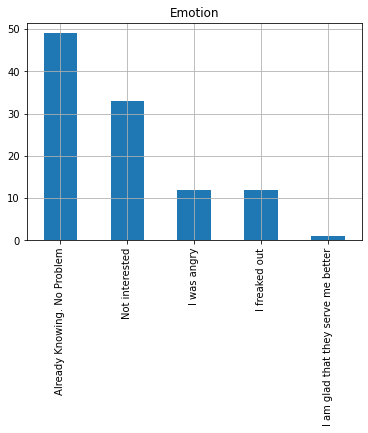

In [9]:
datamain['Emotion'].value_counts().plot(kind = 'bar')
plt.title("Emotion")
plt.grid()

** Let's Look at Age Ratios  **

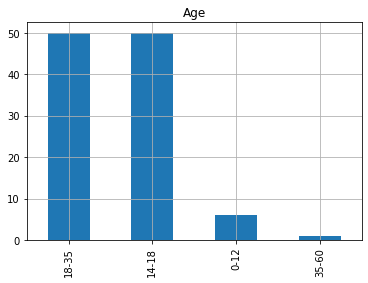

In [10]:
datamain['Age'].value_counts().plot(kind = 'bar')
plt.title("Age")
plt.grid()

** We'll now review our Google Trends Data **

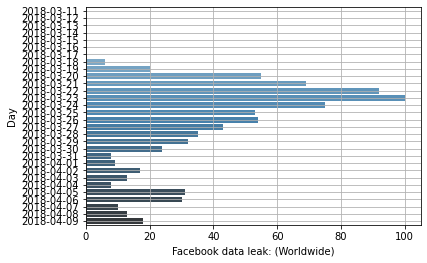

In [14]:
import seaborn as sns
sns.barplot(x="Facebook data leak: (Worldwide)", y="Day", data=datagoogle,  palette="Blues_d")
plt.grid()

# 6) Text Mining

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('../input/facedata/facedataen.csv')

# Cleaning the texts
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 68):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Data'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix

FileNotFoundError: ignored

In [ ]:
from sklearn.neural_network import MLPClassifier
nn=MLPClassifier(hidden_layer_sizes=(7,), max_iter=2000, alpha=0.1,
                     solver='sgd', verbose=10, random_state=21, tol=0.000000001)

nn.fit(X_train,y_train)
# Predicting the Test set results
y_pred = nn.predict(X_test)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_MLPClassifier = round(accuracy_score(y_test, y_pred) * 100, 2)
print()
print("confusion_matrix:\n", cm)
print("accuracy_score: ", acc_MLPClassifier)

In [ ]:
from sklearn.neural_network import MLPClassifier
nn=MLPClassifier(hidden_layer_sizes=(7,), max_iter=2500, alpha=0.1,
                     solver='sgd', verbose=10,random_state=21,tol=0.000000001)

nn.fit(X_train,y_train)
# Predicting the Test set results
y_pred = nn.predict(X_test)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_MLPClassifier1 = round(accuracy_score(y_test, y_pred) * 100, 2)
print()
print("confusion_matrix:\n", cm)
print("accuracy_score: ", acc_MLPClassifier1)

In [ ]:
from sklearn.neural_network import MLPClassifier
nn=MLPClassifier(hidden_layer_sizes=(15,), max_iter=2000, alpha=0.1,
                     solver='sgd', verbose=10,random_state=21,tol=0.000000001)

nn.fit(X_train,y_train)
# Predicting the Test set results
y_pred = nn.predict(X_test)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_MLPClassifier2 = round(accuracy_score(y_test, y_pred) * 100, 2)
print()
print("confusion_matrix:\n", cm)
print("accuracy_score: ", acc_MLPClassifier2)

In [ ]:
from sklearn.neural_network import MLPClassifier
nn=MLPClassifier(hidden_layer_sizes=(15,), max_iter=2500, alpha=0.1,
                     solver='sgd', verbose=10,random_state=21,tol=0.000000001)

nn.fit(X_train,y_train)
# Predicting the Test set results
y_pred = nn.predict(X_test)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_MLPClassifier3 = round(accuracy_score(y_test, y_pred) * 100, 2)
print()
print("confusion_matrix:\n", cm)
print("accuracy_score: ", acc_MLPClassifier3)

# 7) Investigation of Text Mining Results

In [ ]:
models = pd.DataFrame({
    'Model': ['Iter=2000 HL=7', 
              'Iter=2500 HL=7', 'Iter=2000 HL=15', 
              'Iter=2500 HL=15'],
    'Score': [ acc_MLPClassifier, 
              acc_MLPClassifier1, acc_MLPClassifier2, 
             acc_MLPClassifier3]})
models.sort_values(by='Score', ascending=False)

# Source :

* [Google Trends Data](https://trends.google.com.tr/trends/explore?q=facebook%20data%20leak)
* [DataScience Tutorial For Beginners](https://www.kaggle.com/kanncaa1/data-sciencetutorial-for-beginners)
* [AI-Deep Learning- Machine Learning Course](https://github.com/uzay00/KaVe)

**Thank you for reading, if you have a questions dont be hesitate comment**